# Project Details

This is a project to develop a script to read climate data from CDF files and write the **mean** of the data contained in each file to one CSV.

Below is code and setup details shared by environmental scientist Ryan Kopper ([github](https://github.com/rkopper610)).  
  
With the python libraries [xarray](https://xarray.pydata.org/en/v0.9.6/installing.html) and netCDF4, we will be able to read CDF files.

#### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

import xarray as xr
import netCDF4 as nc4
from netCDF4 import Dataset

import matplotlib.ticker as mticker
import cftime
from os import listdir
from os.path import isfile, join

# import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import cartopy.feature as cfeature

# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

### CDF Data

#### Sample Data File Paths

In [22]:
read_data_paths = ['data/read_data/'+f for f in listdir('data/read_data') if isfile(join('data/read_data', f))]

In [23]:
read_data_paths

['data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn.nc6',
 'data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-LM_historical_r1i1p1f1_gn.nc6',
 'data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NESM3_historical_r1i1p1f1_gn.nc6']

### Loading hist temp/precip data in to create plots

Loading multiple netcdf files with xarray
* http://xarray.pydata.org/en/stable/user-guide/io.html#reading-multi-file-datasets
* http://wiki.seas.harvard.edu/geos-chem/index.php/Working_with_netCDF_data_files

path names: '/Users/ryankopper/Documents/CC_project/hist'

* Tylor Diagram (See Figure 8.4 in this link; https://www.ipcc.ch/site/assets/uploads/2018/03/TAR-08.pdf)
* Box-Whisker Plot (Attaching one example)

These two analyses will be for the HIST case. for each variable pr, and tas separately for three seasons. (JJAS, ONDK, FMAM). Create a script to load the data and create objects - plot on another script. 


#### NorESM2-MM

In [28]:
clim = Dataset('data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn.nc6')

precip = clim.variables['pr'][:,:,:]

precip = precip[1,:,:]

precip
# avg_precip = np.mean(variables['pr'][:,:,:])

# temp_sd = temp_sd[0,:,:]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [32]:
clim.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     units: years since 1985-12-31 12:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (30,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (180,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'pr': <class 'netCDF4._netCDF4.Variable'>
 float32 pr(time, lat, lon)
     standard_name: precipitation_flux
     long_name: Precipitation
     units: kg m-2 s-

In [66]:
clim['pr'][0]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [29]:
clim.variables['pr']

<class 'netCDF4._netCDF4.Variable'>
float32 pr(time, lat, lon)
    standard_name: precipitation_flux
    long_name: Precipitation
    units: kg m-2 s-1
    _FillValue: 1e+20
    missing_value: 1e+20
    comment: includes both liquid and solid phases
    original_name: PRECT
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2019-11-25T21:53:29Z altered by CMOR: Converted type from 'd' to 'f'.
unlimited dimensions: time
current shape = (30, 180, 360)
filling on

In [30]:
clim

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/cdi)
    history: Mon Jul 26 22:51:59 2021: cdo -L setcalendar,standard -ifthen /fefs1/ceccr/mriaz1/.y1y2/analysis_cmip6/AR6/new_38_models/ethiopia.1p0.nc MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn.nc6 ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn.nc6
Sun May 31 20:48:17 2020: cdo -b F64 setmissval,-99999.0 1.nc ethopia.final.nc
Sun May 31 20:46:02 2020: cdo remapcon,r360x180 ethopia.nc 1.nc
    source: NorESM2-MM (2017): 
aerosol: OsloAero
atmos: CAM-OSLO (1 degree resolution; 288 x 192; 32 levels; top level 3 mb)
atmosChem: OsloChemSimp
land: CLM
landIce: CISM
ocean: MICOM (1 degree resolution; 360 x 384; 70 levels; top grid cell minimum 0-2.5 m [native model uses hybrid density and generic upper-layer coordinate interpolated to z-level for contributed data])
ocnBgchem: HAM

#### NESM3

In [67]:
clim = Dataset('data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NESM3_historical_r1i1p1f1_gn.nc6')

precip = clim.variables['pr'][:,:,:]

precip = precip[1,:,:]

precip
# avg_precip = np.mean(variables['pr'][:,:,:])

# temp_sd = temp_sd[0,:,:]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [81]:
clim.variables.all

AttributeError: 'dict' object has no attribute 'all'

In [68]:
clim.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     units: years since 1985-12-31 12:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (30,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (180,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'pr': <class 'netCDF4._netCDF4.Variable'>
 float32 pr(time, lat, lon)
     standard_name: precipitation_flux
     long_name: Precipitation
     units: kg m-2 s-

In [66]:
clim['pr'][0]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [29]:
clim.variables['pr']

<class 'netCDF4._netCDF4.Variable'>
float32 pr(time, lat, lon)
    standard_name: precipitation_flux
    long_name: Precipitation
    units: kg m-2 s-1
    _FillValue: 1e+20
    missing_value: 1e+20
    comment: includes both liquid and solid phases
    original_name: PRECT
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2019-11-25T21:53:29Z altered by CMOR: Converted type from 'd' to 'f'.
unlimited dimensions: time
current shape = (30, 180, 360)
filling on

In [30]:
clim

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/cdi)
    history: Mon Jul 26 22:51:59 2021: cdo -L setcalendar,standard -ifthen /fefs1/ceccr/mriaz1/.y1y2/analysis_cmip6/AR6/new_38_models/ethiopia.1p0.nc MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn.nc6 ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn.nc6
Sun May 31 20:48:17 2020: cdo -b F64 setmissval,-99999.0 1.nc ethopia.final.nc
Sun May 31 20:46:02 2020: cdo remapcon,r360x180 ethopia.nc 1.nc
    source: NorESM2-MM (2017): 
aerosol: OsloAero
atmos: CAM-OSLO (1 degree resolution; 288 x 192; 32 levels; top level 3 mb)
atmosChem: OsloChemSimp
land: CLM
landIce: CISM
ocean: MICOM (1 degree resolution; 360 x 384; 70 levels; top grid cell minimum 0-2.5 m [native model uses hybrid density and generic upper-layer coordinate interpolated to z-level for contributed data])
ocnBgchem: HAM

### Xarray

In [24]:
# Read a restart file into an xarray Dataset object
ds1 = xr.open_dataset('data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NESM3_historical_r1i1p1f1_gn.nc6')
 
# Print the contents of the TS DataSet
print(ds1)

ValueError: unable to decode time units 'years since 1985-12-31 12:00:00' with "calendar 'standard'". Try opening your dataset with decode_times=False or installing cftime if it is not installed.

In [9]:
ds1

<xarray.Dataset>
Dimensions:  (time: 30, lon: 360, lat: 180)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 25.0 26.0 27.0 28.0 29.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/48)
    CDI:                    Climate Data Interface version 1.9.1 (http://mpim...
    history:                Mon Jul 26 22:51:43 2021: cdo -L setcalendar,stan...
    source:                 NESM v3 (2016): \naerosol: none\natmos: ECHAM v6....
    institution:            Nanjing University of Information Science and Tec...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    tracking_id:            hdl:21.14100/add47107-a799-44e7-b78e-851948436770
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.4.0
    CDO:                    Climate Data Operators version 1.9.1 (http://mpim...

In [10]:
# Read a restart file into an xarray Dataset object
ds2 = xr.open_dataset('data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NorESM2-LM_historical_r1i1p1f1_gn.nc6', decode_times=False)
 
# Print the contents of the TS DataSet
print(ds2)

<xarray.Dataset>
Dimensions:  (time: 30, lon: 360, lat: 180)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 25.0 26.0 27.0 28.0 29.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                       Climate Data Interface version 1.9.1 (http://m...
    history:                   Mon Jul 26 22:51:51 2021: cdo -L setcalendar,s...
    source:                    NorESM2-LM (2017): \naerosol: OsloAero\natmos:...
    institution:               NorESM Climate modeling Consortium consisting ...
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    ...                        ...
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor

In [15]:
ds2['time'][2]

<xarray.DataArray 'time' ()>
array(14.5)

In [7]:
# Examine a single .nc file
# 
# Imports
# import xarray as xr    
# import numpy as np

#ET_MEAN_FMAM_1985_2014_timeseries_tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn.nc6
# Read a restart file into an xarray Dataset object
ds1 = xr.open_dataset('data/read_data/ET_MEAN_ONDJ_1985_2014_timeseries_pr_Amon_NESM3_historical_r1i1p1f1_gn.nc6', decode_times=False)
 
# Print the contents of the TS DataSet
print(ds1)

# Print the units of the SpeciesRst_O3 field
print(ds1["tas"].units) #still in kelevins

# Convert the SpeciesRst_O3 (O3 concentration) to 
# a numpy array so that we can take the sum
tas_values = ds1["tas"].values

<xarray.Dataset>
Dimensions:  (time: 30, lon: 360, lat: 180)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 25.0 26.0 27.0 28.0 29.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/48)
    CDI:                    Climate Data Interface version 1.9.1 (http://mpim...
    history:                Mon Jul 26 22:51:43 2021: cdo -L setcalendar,stan...
    source:                 NESM v3 (2016): \naerosol: none\natmos: ECHAM v6....
    institution:            Nanjing University of Information Science and Tec...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    tracking_id:            hdl:21.14100/add47107-a799-44e7-b78e-851948436770
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:              

KeyError: 'tas'

(array([  11.,   81.,  434.,  878., 1334., 1388.,  467.,  103.,   10.,
           6.]),
 array([13.331583, 15.97831 , 18.625036, 21.271763, 23.91849 , 26.565216,
        29.211945, 31.858671, 34.505398, 37.152122, 39.79885 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

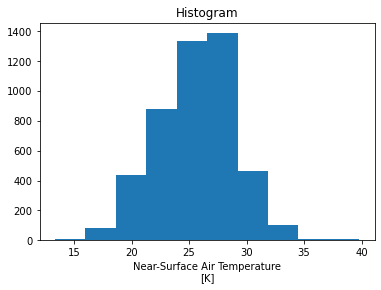

In [18]:
temp = ds.tas
temp

# from matplotlib import pyplot as plt
temp[20].plot()

In [2]:
# # Load the ALL FMAM season of temperature.
# # help(xr.open_mfdataset)

# import xarray as xr
# ds = xr.open_mfdataset('/Users/ryankopper/Documents/CC_project/hist/FMAM/tas/*.nc6', parallel=True)

Another method to load in multiple .nc files

In [ ]:
# import netCDF4 as nc

# # read multiple files (wildcard)
# vn = nc.MFDataset('/Users/ryankopper/Documents/CC_project/hist/FMAM/tas/*.nc6') 

In [ ]:
# import glob
# import netCDF4

# list_of_paths = glob.glob('/Users/ryankopper/Documents/CC_project/hist/FMAM/tas/*.nc6', recursive=True)

# nc = netCDF4.MFDataset(list_of_paths)

In [ ]:
# import xarray as xr
# test = xr.open_mfdataset('/Users/ryankopper/Documents/CC_project/hist/FMAM/tas/*.nc6',parallel=True, compat='no_conflicts')

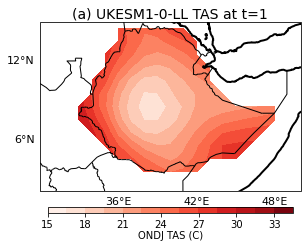

In [55]:
# import numpy as np

# from netCDF4 import Dataset

# import matplotlib.pyplot as plt
# from matplotlib import cm
# import matplotlib.ticker as mticker

# import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import cartopy.feature as cfeature

clim = Dataset('/Users/ryankopper/Documents/CC_project/hist/ONDJ/tas/ET_MEAN_ONDJ_1985_2014_timeseries_tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn.nc6')

lons = clim.variables['lon'][:]
lats = clim.variables['lat'][:]
temp = clim.variables['tas'][:,:,:]

temp = temp[1,:,:]

# Plot the data using matplotlib and cartopy

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())

g_east = 50
g_west = 30
g_north = 15
g_south = 2

ax.set_extent([g_west, g_east, g_south, g_north])
#ax.set_global()

ax.add_feature(cfeature.COASTLINE,linewidth=2)
ax.add_feature(cfeature.BORDERS)

clevs = np.arange(15,35,1.5)
plt.contourf(lons, lats, temp, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.Reds)

#########--------Style of Figure-------*******************Start

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=0.50, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlines = False
gl.ylines = False
gl.ylocator = mticker.FixedLocator([6, 12, 18, 24])
gl.xlocator = mticker.FixedLocator([24, 30, 36, 42, 48, 54])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11,'color': 'black', 'weight': 'normal'}
gl.ylabel_style = {'size': 11,'color': 'black', 'weight': 'normal'}

plt.title('(a) UKESM1-0-LL TAS at t=1', size=14, pad=4)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.07, aspect=40, shrink=0.55)
cb.set_label('ONDJ TAS (C)',size=10,rotation=0,labelpad=1)
cb.ax.tick_params(labelsize=10)

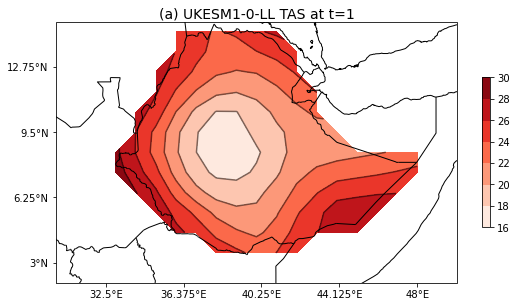

In [57]:
# import netCDF4 as nc4
# import numpy as np
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

g_east = 50
g_west = 30
g_north = 15
g_south = 2

## temp Annual
nc_file = '/Users/ryankopper/Documents/CC_project/hist/ONDJ/tas/ET_MEAN_ONDJ_1985_2014_timeseries_tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn.nc6'
std = '/Users/ryankopper/Documents/CC_project/hist/FMAM/tas/std_batch/ET_MEAN_FMAM_1985_2014_timeseries_tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn.nc6STD.nc'


# Open the netCDF file and read temperature
with nc4.Dataset(nc_file,'r') as ncid:
     lons      = ncid.variables['lon'][:] # longitude grid points
     lats      = ncid.variables['lat'][:] # latitude grid points
     temp      = ncid.variables['tas'][:]
 
with nc4.Dataset(nc_file,'r') as ncid:
     lons_sd      = ncid.variables['lon'][:] # longitude grid points
     lats_sd      = ncid.variables['lat'][:] # latitude grid points
     temp_sd      = ncid.variables['tas'][:]
        

fig = plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=map_projection)

im = ax.contourf(lons, lats, temp[0,:,:], transform=map_projection,cmap='Reds')
im_sd = ax.contour(lons_sd, lats_sd, temp[0,:,:], colors='black', alpha=0.5)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

plt.title('(a) UKESM1-0-LL TAS at t=1', size=14, pad=4)
ax.set_xticks(np.linspace(48, 32.5, 5), crs=map_projection)
ax.set_yticks(np.linspace(16, 3, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = fig.colorbar(im, orientation='vertical', shrink=0.55)

ax.set_extent([g_west, g_east, g_south, g_north])
plt.show()

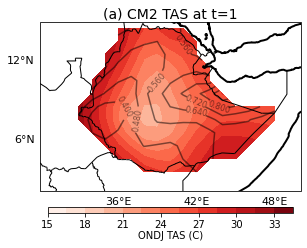

In [39]:
# ADDING IN STANDARD DEVIATION AS BLACK CONTOUR LINES
import numpy as np

from netCDF4 import Dataset

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

clim = Dataset('/Users/ryankopper/Documents/CC_project/hist/FMAM/tas/ET_MEAN_FMAM_1985_2014_timeseries_tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn.nc6')
std = Dataset('/Users/ryankopper/Documents/CC_project/hist/FMAM/tas/std_batch/ET_MEAN_FMAM_1985_2014_timeseries_tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn.nc6STD.nc')


lons = clim.variables['lon'][:]
lats = clim.variables['lat'][:]
temp = clim.variables['tas'][:,:,:]

temp = temp[1,:,:]


lons_sd = std.variables['lon'][:]
lats_sd = std.variables['lat'][:]
temp_sd = std.variables['tas'][:,:,:]

temp_sd = temp_sd[0,:,:]

# Plot the data using matplotlib and cartopy

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())

g_east = 50
g_west = 30
g_north = 15
g_south = 2

ax.set_extent([g_west, g_east, g_south, g_north])
#ax.set_global()

ax.add_feature(cfeature.COASTLINE,linewidth=2)
ax.add_feature(cfeature.BORDERS)

clevs = np.arange(15,35,1.5)
stc_con = plt.contour(lons_sd, lats_sd, temp_sd, transform=ccrs.PlateCarree(), colors='black', alpha=0.5)
plt.clabel(stc_con, inline=True, fontsize=8)
plt.contourf(lons, lats, temp, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.Reds)


#########--------Style of Figure-------*******************Start

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=0.50, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlines = False
gl.ylines = False
gl.ylocator = mticker.FixedLocator([6, 12, 18, 24])
gl.xlocator = mticker.FixedLocator([24, 30, 36, 42, 48, 54])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11,'color': 'black', 'weight': 'normal'}
gl.ylabel_style = {'size': 11,'color': 'black', 'weight': 'normal'}

plt.title('(a) CM2 TAS at t=1', size=14, pad=4)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.07, aspect=40, shrink=0.55)
cb.set_label('ONDJ TAS (C)',size=10,rotation=0,labelpad=1)
cb.ax.tick_params(labelsize=10)